## gradient descent algorithm with line search

线搜索(line search)算法涉及一个搜索方向和合适的步长

$$ x_{k+1} = x_k + \alpha_k p_k $$

大多数线搜索算法都要求 $p_k$ 是一个下降的方向，即$p_k^T \nabla f_k < 0$.一般地，可选 
$$
p_k = -B_k^{-1} \nabla f_k
$$
其中$B_k$ 是对称非奇异矩阵。值得一提的是，在牛顿法中，$B_k$是海塞矩阵,拟牛顿法中，是海塞矩阵的近似。在梯度下降法中，可以用单位阵。

In [2]:
from IPython.display import Image

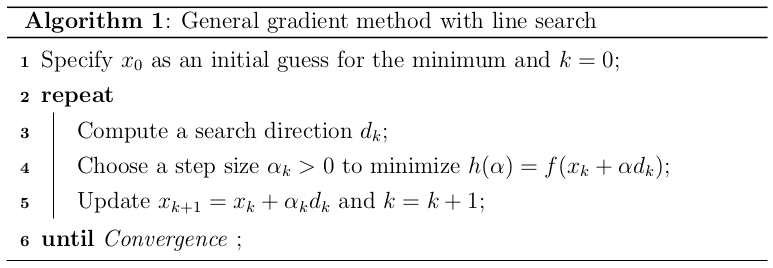

In [3]:
Image("general_gradient_method_with_line_search.png")

终止条件可以有3个：
* $\left\Vert \nabla f(x_k)\right\Vert \leq tol$
* $\left\Vert x_{k+1} - x_k\right\Vert \leq tol$
* $\left\Vert f(x_{k+1})-f(x_k)\right\Vert \leq tol$

确定好方向后，接下来就该确定步长.定义函数

$$
\phi(\alpha) = f(x_k + \alpha p_k),\quad \alpha > 0
$$

我们希望找到一个$\alpha$，使得$f(x_k+\alpha p_k)$最小，也就是$\phi(\alpha)$最小.有2种方法：

* 直接最小化$\phi(\alpha)$
* 找到一个$\alpha$使得$\phi(\alpha)$足够小即可。

在直接最小化比较耗时的情况下，更多的会采取第二种方法。采用第二种方法时，$\alpha$要满足一些条件。

## wolfe condition

wolfe conditon 有两个：sufficient decrease and curvature condition. 其中 Armijo condition 保证了 succicient decrease.

### Armijo condition

$$
f(x_k + \alpha p_k) \leq f(x_k) + c_1 \alpha \nabla f_k^T p_k
$$

In [4]:
Image(url = 'http://images.cnitblog.com/i/573996/201406/211450267074821.png')

### curvature condition

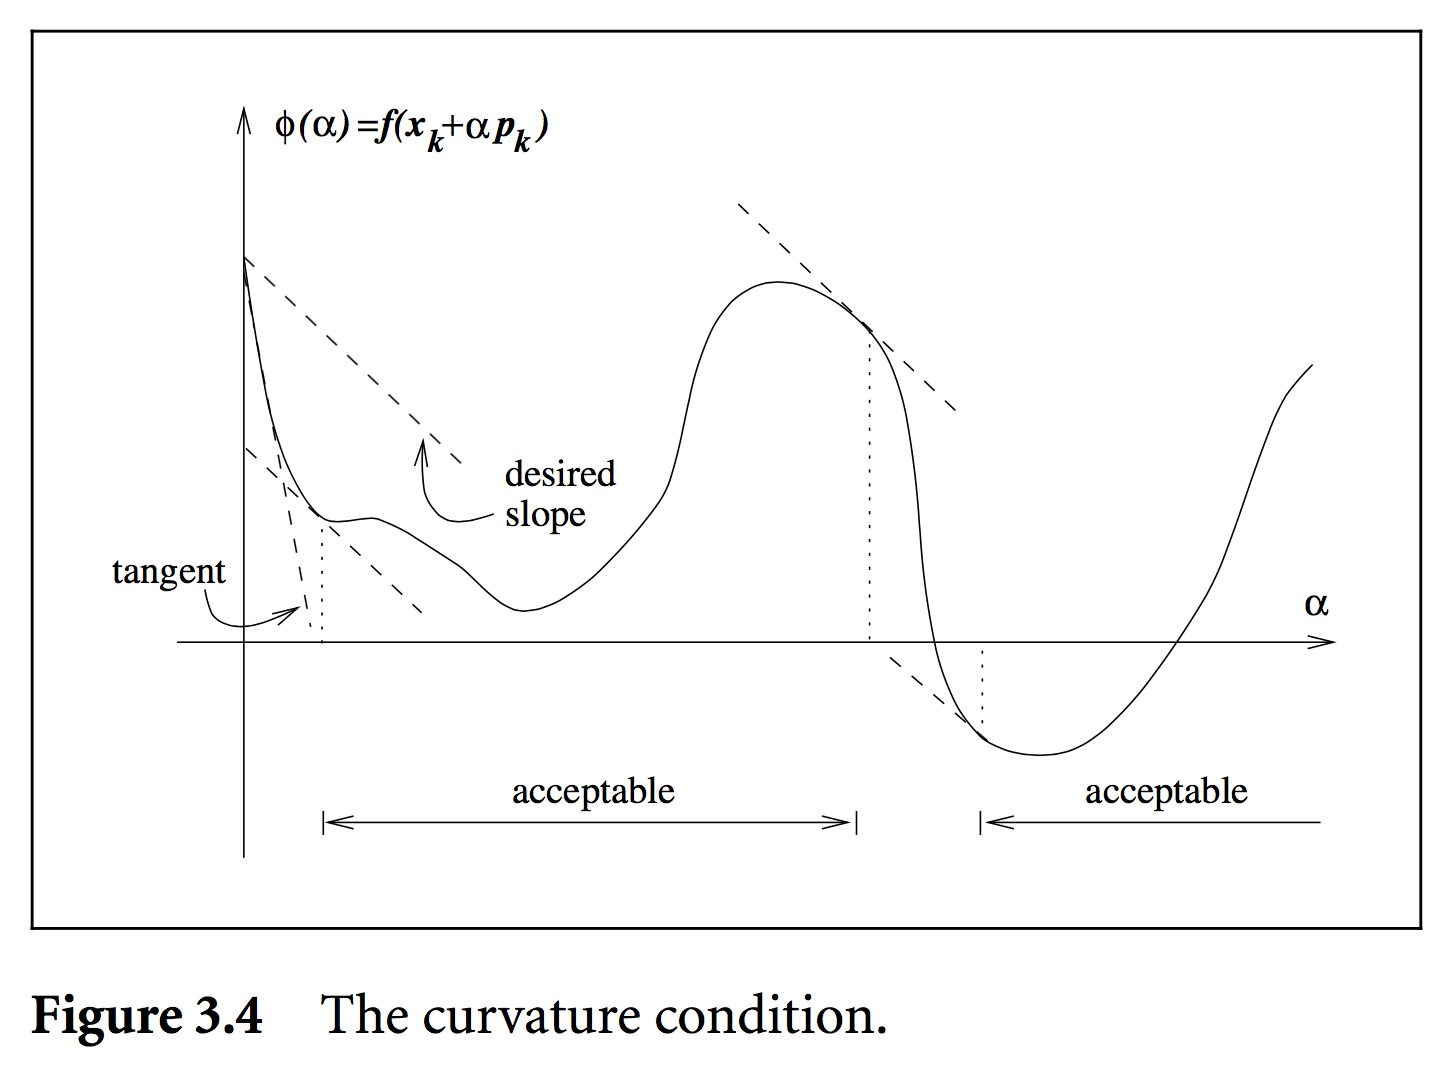

In [5]:
Image('curvature_condition.png')

$$
\nabla f(x_k+\alpha_kp_k)^T p_k \geq c_2 \nabla f_k^T p_k
$$

注意到不等式左边就是$\phi^{'}(\alpha_k)$. curvature condition 是要求在$\alpha_k$的斜率要大于 $c_2$倍的$\phi^{'}(0)$.这很合理，因为如果$\phi^{'}(\alpha_k)$很负的话，我们可以预见到增大$\alpha$可以让$f(x_k)$有很大下降；另一方面，如果$\phi^{'}(\alpha_k)$只是稍小于0，甚至大于0，说明在当前方向上我们不可能让$f$下降了，应该停止在这个方向的搜索。

合并两个条件就是 
* wolfe condition
$$
\begin{cases}
f(x_k + \alpha p_k) \leq f(x_k) + c_1 \alpha \nabla f_k^T p_k\\
\nabla f(x_k+\alpha_kp_k)^T p_k \geq c_2 \nabla f_k^T p_k
\end{cases}
$$
其中，$0<c_1<c_2<1$

如图3.5所示，满足 wolfe condition 的步长，不一定是靠近最小化$f$的步长。strong wolfe condition 是要求$\phi^{'}(\alpha_k)$不能太“正”(positive).这样就排除了那些远离$\phi$驻点的 $\alpha$

* strong wolfe condition

$$
\begin{cases}
f(x_k + \alpha p_k) \leq f(x_k) + c_1 \alpha \nabla f_k^T p_k\\
\left\Vert \nabla f(x_k+\alpha_kp_k)^T p_k \right\Vert \leq c_2 \left\Vert \nabla f_k^T p_k \right\Vert
\end{cases}
$$
其中，$0<c_1<c_2<1$


**综上，$\phi^{'}(\alpha)$可能是负数也可能是正数。curvature conditon 是说，如果$\phi^{'}(\alpha)$是负数的话，我们希望它大于一个值，不要太负了，这样就排除了较小的$\alpha$，因为较小的$\alpha$的斜率较大(指绝对值)。这样的结果就是我们期望得到的斜率要“平”一些，更接近驻点。strong wolfe condition 是说，不管$\phi^{'}(\alpha)$为正还是为负，我们希望它的绝对值要小一些，也就是斜率更“平”一些，这样就排除远离驻点的$\alpha$。**

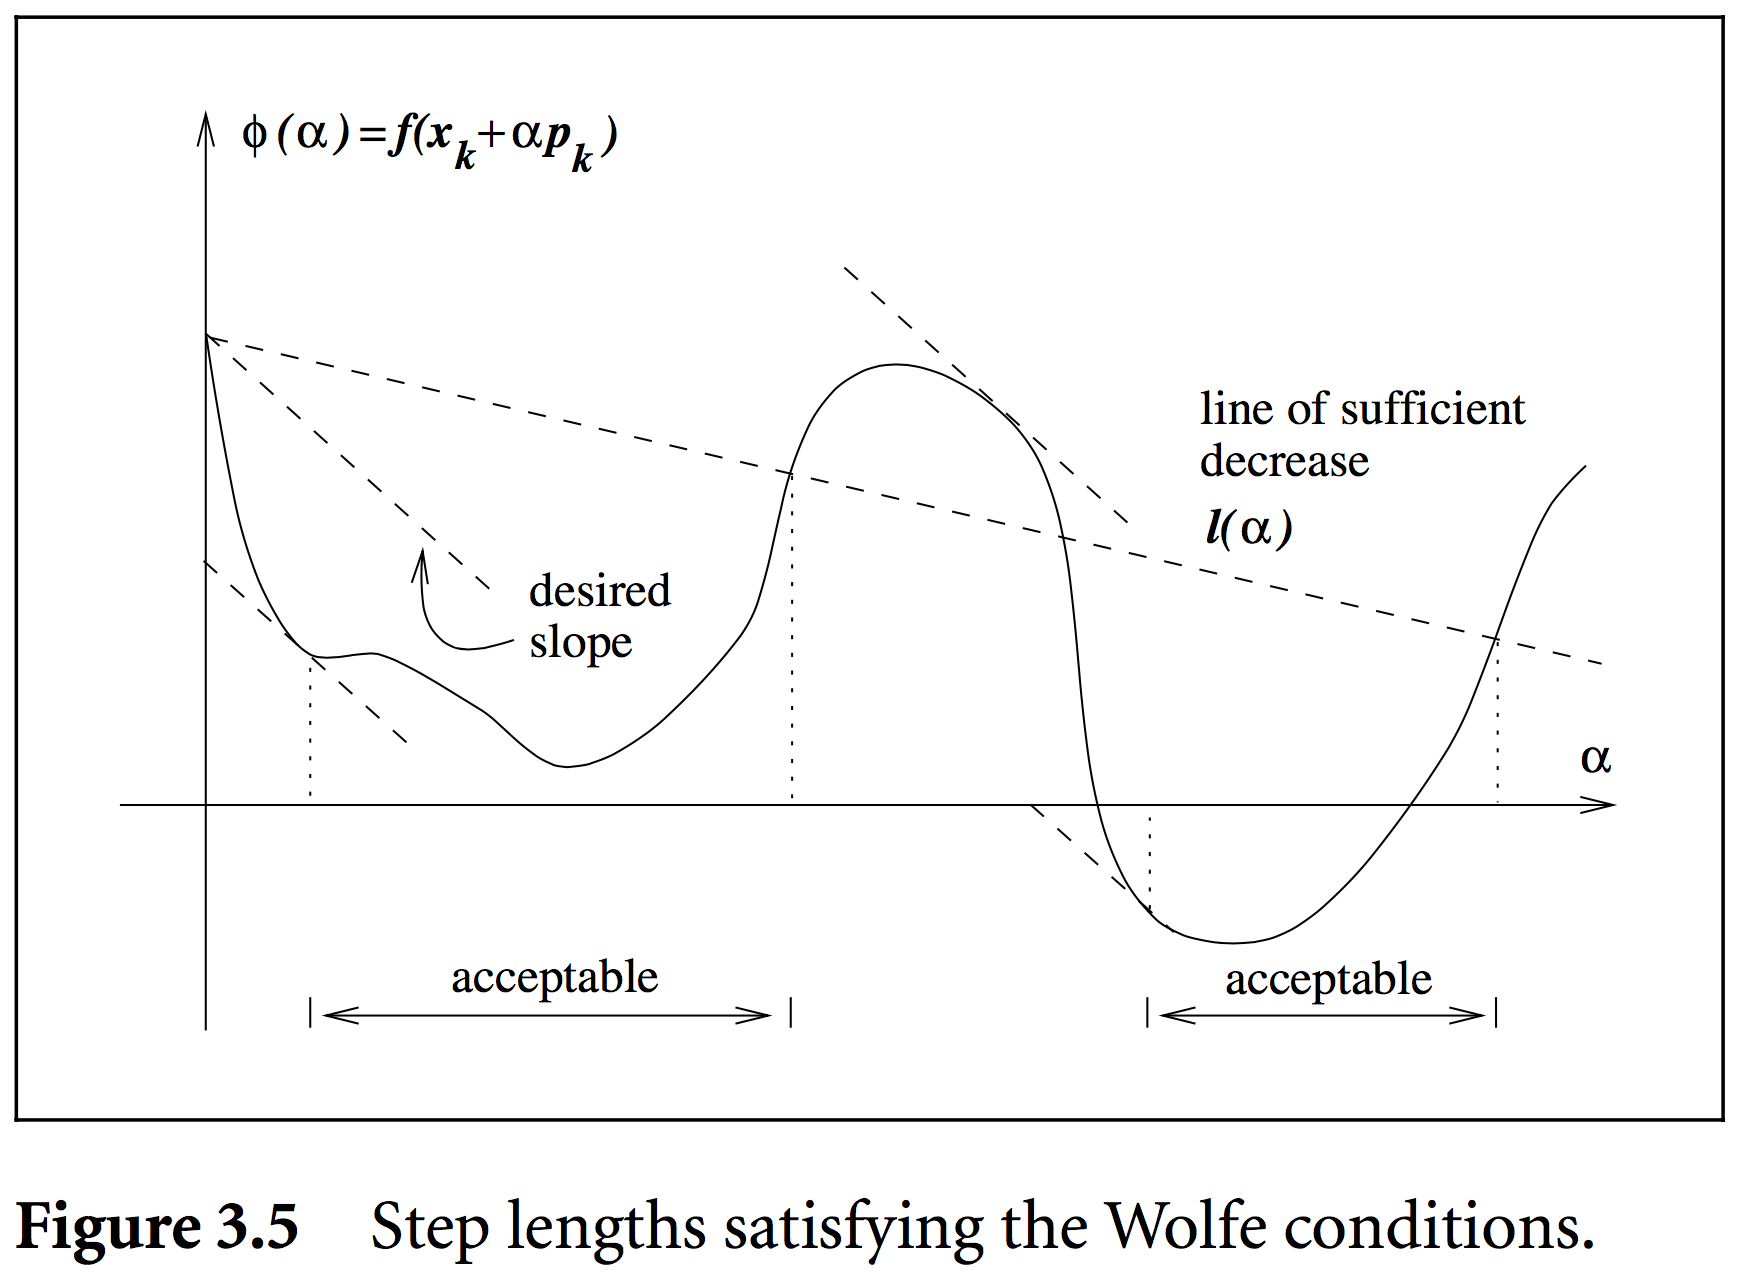

In [6]:
Image('wolfe_condition.png')

## 仅仅检查是否符合 armijo condition 的算法

### back-track search

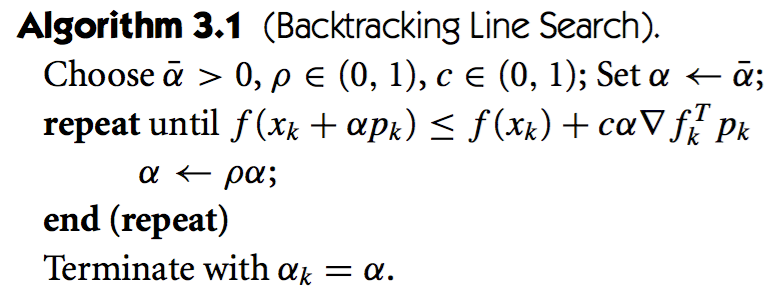

In [7]:
Image('backtracking_line_search.png')

In [12]:
def armijo_backtracking():
    pass

def exact_search(f,xk,pk):
    pass
    
    



### interpolation
注意到 Armijo rule可以写成
$$
\phi(\alpha_k) \leq \phi(0) + c_1 \alpha_k \phi^{'}(0)
$$
假设此时$\alpha_0$已经给出，如果
$$
\phi(\alpha_0) \leq \phi(0) + c_1 \alpha_0 \phi^{'}(0)
$$
则停止搜索。不然，则$\alpha_0$是落入了图3的不可接受区域，且我们知道区间$[0,\alpha_0]$必定包含可行的$\alpha_k$。
#### quadratic
此时，我们已知的数据有$\phi(0),\phi^{'}(0),\phi(\alpha_0$,根据这三个数据，我们进行二次插值
$$
\phi_{q}(\alpha)=\bigg(\frac{\phi(\alpha_{0})-\phi(0)-\alpha_{0}\phi^{'}(0)}{\alpha_{0}^{2}}\bigg)\alpha^{2}+\phi^{'}(0)\alpha+\phi(0)
$$

我们最小化这个二次方程，得到
$$
\alpha_{1}=-\frac{\phi^{'}(0)\alpha_{0}^{2}}{2[\phi(\alpha_{0})-\phi(0)-\phi^{'}(0)\alpha_{0}]}
$$

#### cubic
如果得到的$\alpha_1$还是不满足要求，我们利用得到的$\alpha_1$和前面的信息，进行三次插值
$$
\phi_{c}(\alpha)=a\alpha^{3}+b\alpha^{2}+\alpha\phi^{'}(0)+\phi(0)
$$
把前面的信息带入公式可得待定系数$a,b$
$$
\begin{bmatrix}a\\
b
\end{bmatrix}=\frac{1}{\alpha_{0}^{2}\alpha_{1}^{2}(\alpha_{1}-\alpha_{0})}\begin{bmatrix}\alpha_{0}^{2} & -\alpha_{1}^{2}\\
-\alpha_{0}^{3} & \alpha_{1}^{3}
\end{bmatrix}\begin{bmatrix}\phi(\alpha_{1})-\phi(0)-\phi^{'}(0)\alpha_{1}\\
\phi(\alpha_{0})-\phi(0)-\phi^{'}(0)\alpha_{0}
\end{bmatrix}
$$

最小化这个三次方程，我们可以看出$\alpha_2$位于$[0,\alpha_1]$之间。

$$
\alpha_{2}=\frac{-b+\sqrt{b^{2}-3a\phi^{'}(0)}}{3a}
$$

如果有必要，这个过程可以一直重复下去（利用$\phi(0),\phi^{'}(0)$和最近取得的2个$\phi$值）。如果出现a=0的情况，三次插值函数退化为二次插值函数，在实现该算法时需要注意这点。如果算出的$\alpha_i$ 和 $\alpha_{i-1}$ 太过接近，或者 $\alpha_i$ 远小于 $\alpha_{i-1}$，我们可以重置 $\alpha_i=\alpha_{i-1}/2$.


以上的讨论基于求$\phi^{'}$比求$\phi$代价更大。我们也可以设计仅仅利用最近的两个$\phi$值和导数来进行三次插值。
#### hermite
$$
\begin{equation} \begin{array}{rl} H_3(\alpha)=&\left[1+2\frac{\alpha_i-\alpha}{\alpha_i-\alpha_{i-1}}\right]\left[\frac{\alpha-\alpha_{i-1}}{\alpha_i-\alpha_{i-1}}\right]^2h(\alpha_{i})\\ &+\left[1+2\frac{\alpha-\alpha_{i-1}}{\alpha_i-\alpha_{i-1}}\right]\left[\frac{\alpha_{i+1}-\alpha}{\alpha_i-\alpha_{i-1}}\right]^2h(\alpha_{i-1})\\ &+(\alpha-\alpha_i)\left[\frac{\alpha-\alpha_{i-1}}{\alpha_i-\alpha_{i-1}}\right]^2h'(\alpha_i)\\ &+(\alpha-\alpha_{i-1})\left[\frac{\alpha_i-\alpha}{\alpha_i-\alpha_{i-1}}\right]^2h'(\alpha_{i-1}) 
\end{array} \end{equation}
$$

下一个步长
$$
\begin{equation} 
\alpha_{i+1}=\alpha_i-(\alpha_i-\alpha_{i-1})\left[\frac{h'(\alpha_i)+d_2-d_1}{h'(\alpha_i)-h'(\alpha_{i-1})+2d_2}\right] 
\end{equation}
$$

其中
$$
\begin{equation} d_1=h'(\alpha_i)+h'(\alpha_{i-1})-3\left[\frac{h(\alpha_i)-h(\alpha_{i-1})}{\alpha_i-\alpha_{i-1}}\right] \end{equation}
$$

$$
\begin{equation} d_2=sign(\alpha_i-\alpha_{i-1})\sqrt{d_1^2-h'(\alpha_{i-1})h'(\alpha_i)} \end{equation}
$$

**Cubic** interpolation gives **quadratic** convergence in the step length selection algorithm.

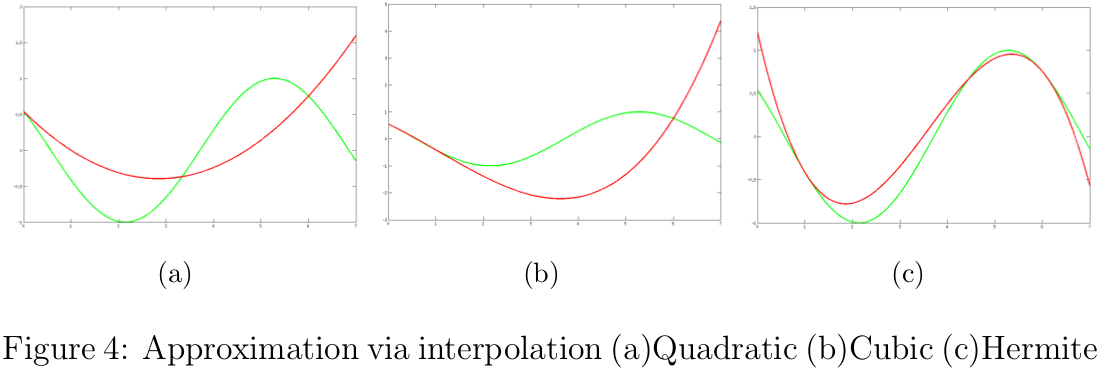

In [9]:
Image('approximation_via_interpolation.png')

### initial step
For Newton and quasi-Newton methods, the search vector $p_k$ contains an intrinsic sense of **scale** (being formed from the local descent, and curvature information), hence the initial trial step length should always be $\alpha_0 = 1$, otherwise we break the quadratic respective super-linear convergence properties.

For other search directions, such as **steepest descent** and **conjugate gradient** (to be described later) directions which do not have a sense of scale, other methods must be used to select a good first trial step:

* strategy 1: Assume that the rate of change in the current iteration will be the same as in the previous iteration, select $α_0$:
$$
\alpha_0^{[k]} = \alpha^{k-1}\frac{p_{k-1}^T \nabla f(x_{k-1})}{p_k^{T}\nabla f(x_k)}
$$

* strategy 2:Use the minimizer of the quadratic interpolant to$ f(x_{k−1}), f(x_k)$, and $\phi^{'}(0) = p^T_{k−1}\nabla f(x_{k−1})$ as the initial α:
$$
\alpha_0^{[k]} = \frac{2[f(x_k) - f(x_{k-1})]}{p_{k-1}^{T}\nabla f(x_{k-1})}
$$


If this strategy is used with a quadratically or super-linearly convergent algorithm, the choice of α0 must be modified slightly to preserve the convergence properties:
$$
\alpha_{0,\textrm{new}}^{[k]} = \min(1,1.01\alpha_0^{[k]})
$$

this ensures that the step length $\alpha_0 = 1$ will eventually always be tried.

## line search with wolfe condition

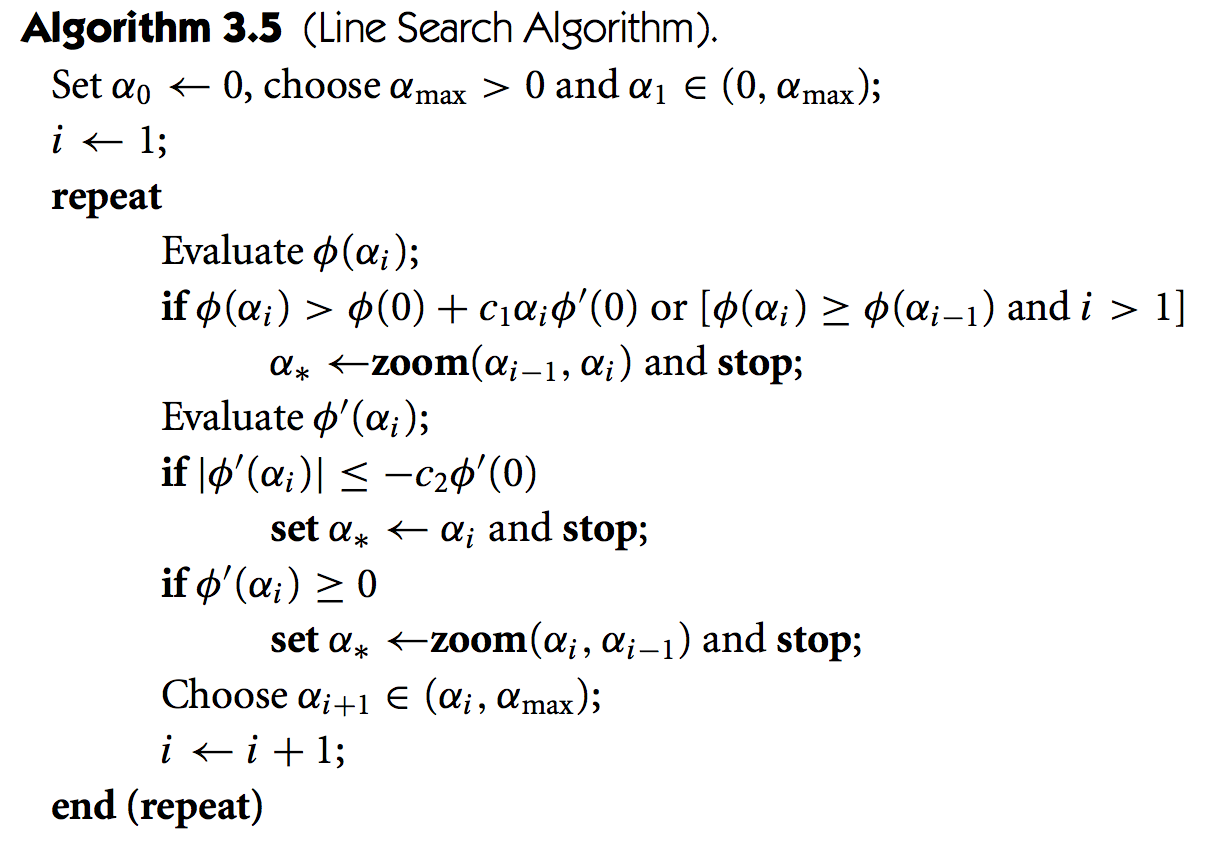

In [10]:
Image("algorithm_line_search_wolfe_condition.png")

算法的逻辑是这样的：
由于 $\alpha_0$ 是在驻点的左边，计算$\alpha_i$，如果$\alpha_i$不满足 armijo condition,或者$\phi(\alpha_i)\geq \phi(\alpha_{i-1})$（因为0附近，$\phi(\alpha)$是下降的，如果出现$\phi(\alpha_i)\geq \phi(\alpha_{i-1})$，说明$\alpha_i$越过了驻点),说明$[\alpha_0,\alpha_i]$包含驻点。然后调用 zoom 函数缩小搜索范围即可。

否则，如果满足了 armijo condition，再看$\alpha_i$是否满足 curvature condition。满足则返回$\alpha_i$。如果不满足，说明$\alpha_i$过小，或者远离驻点。这时候判断$\phi^{'}(\alpha_i)$。如果$\phi^{'}(\alpha_i)>0$，说明驻点还是包含在$[\alpha_{low},\alpha_i]$ 里面的。

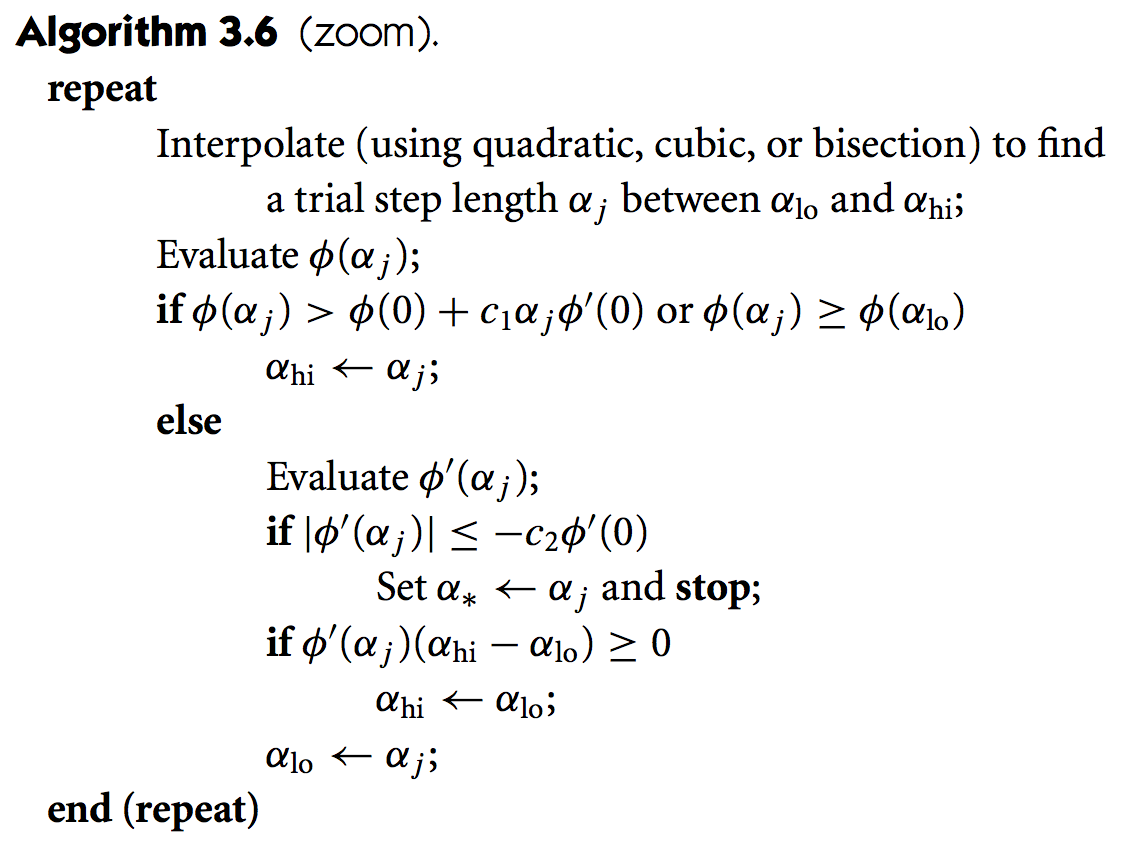

In [11]:
Image("algorithm_zoom.png")